# Path lengths
The first thing we want to take a look at is path lengths. NetworkX allows us to calculate the shortest path between any pair of articles. We begin by comparing the length of human and shortests paths.

*Exercises*

For each source/target pair in the list of human navigation paths, calculate the shortest path using NetworkX. Plot the distribution of path lengths.

In [86]:
import csv

# Go through the articles.tsv and add articles to a list
with open('./articles.tsv', 'r') as f:
    # Skip the headers
    lines_after_12 = f.readlines()[12:]
    reader = csv.reader(lines_after_12)
    articles = []
    for row in reader:
        articles.append(row)

In [87]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Go through the list 'articles' and add articles as nodes to a graph 'G'
for i in range(len(articles)):
    G.add_node(i)

In [88]:
# Go through the links.tsv and add directed link from one node to another
with open('./links.tsv', 'r') as f:
    # Skip the headers
    lines_after_12 = f.readlines()[12:]
    reader = csv.reader(lines_after_12, delimiter='\t')
    for row in reader:
        G.add_edge(row[0], row[1])

In [89]:
# Go through the paths_finished.tsv and find the source and target articles and the length between them
with open('./paths_finished.tsv', 'r') as f:
    # Skip the headers
    lines_after_16 = f.readlines()[16:]
    reader = csv.reader(lines_after_16, delimiter='\t')
    human_navigation_paths = []
    for row in reader:
        link_start_end = []
        links = row[3].split(';')      
        # Get the source article
        link_start_end.append(links[0])
        # Get the target article
        link_start_end.append(links[-1])
        # Ignore back steps
        ignore_back_steps = [link for link in links if link != '<']
        # Calculate the length of the human path
        path_length = len(ignore_back_steps) - 1
        link_start_end.append(path_length)
        # Ignore human paths that have length shorter than 3
        if(path_length > 2):
            # Add source/target article and length of path to a list
            human_navigation_paths.append(link_start_end)

In [90]:
# Create an undirected graph of network 'G'
G_undirected = G.to_undirected()

# Go through the list 'human_navigation_paths' and find shortest paths and add to list
shortest_path = []
for i in human_navigation_paths:
    shortest_path.append(nx.shortest_path_length(G_undirected, source=i[0], target=i[1]))

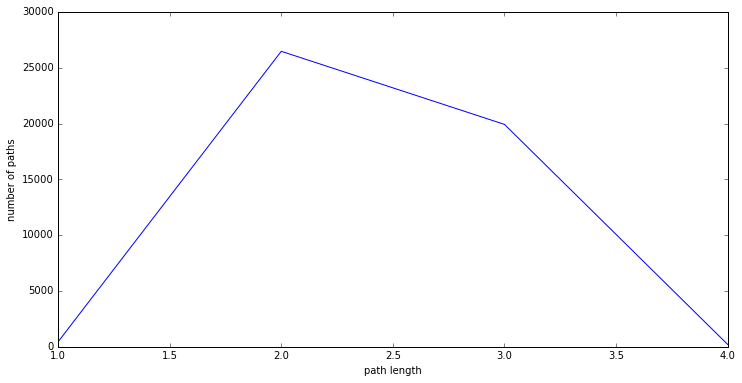

In [91]:
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

# Plot the distribution
x = range(1,5)
y = [shortest_path.count(1), shortest_path.count(2), shortest_path.count(3), shortest_path.count(4)]
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('path length')
plt.ylabel('number of paths')
plt.plot(x, y)
plt.show()

* For each *source/target pair*, calculate the length of the human path. The dataset contains information on people who regret a navigation step and hit the "back" button in their web-browser. It's up to you how to incorporate that information in the path. Justify your choice. Plot the distribution of human path lengths. If I ignore back steps, I get this on log-log scale:

I chose to ignore the "back" button (as seen earlier), because I think it's okay that it's not counted as a step when people come to a dead end.

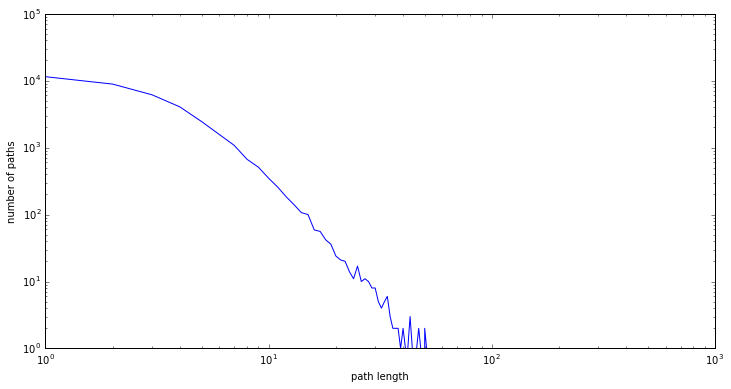

In [92]:
import math

# Unzip the list 'human_navigation_paths' to get human path lengths
link_start, link_end, human_paths = zip(*human_navigation_paths)

# Sort 'human_paths' to find the shortest and longest human path lengths
human_paths_sorted = sorted(human_paths)

# Count how often the path lengths occur
y = []
for i in range(human_paths_sorted[0], (human_paths_sorted[-1] + 1)):
    y.append(human_paths_sorted.count(i))
    
# Plot the distribution
x = range(len(y))
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('path length')
plt.ylabel('number of paths')
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y)
plt.show()

* How much longer are the human paths on average?

In [93]:
# Calculating the sum of both 'human_paths' and 'shortest_path' and divide the difference
# Make sure the lists are of same length
if((len(human_paths)) == len(shortest_path)):
    total_diff = sum(human_paths) - sum(shortest_path)
    print('Human paths are at average ' + str(total_diff/float(len(human_paths))) + ' longer')
else:
    print('This lists are not of same lengh')

Human paths are at average 3.25454159142 longer


* Create scatter plot where each point is a *source/target* pair, and you have human path lengths on the xx-axis and shortests paths on the yy-axis.

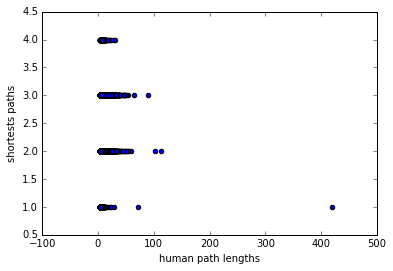

In [94]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(human_paths, shortest_path)
plt.xlabel('human path lengths')
plt.ylabel('shortests paths')
plt.show()

* Is there a correlation between human/shortest path-lengths? What is the correlation.

**Explanation needed**

# Betweenness
*Exercises*

Begin by calculating the betweenness centrality and navigation centrality of all nodes in the wikispedia dataset. Note that calculating the betweenness centrality can take quite a long time, so you might start it running in a separate notebook while first estimating it based on the existing human path.
* First, list the 5 pages with highest navigation centrality.